In [1]:
!pip install hdbscan --upgrade

Requirement already up-to-date: hdbscan in /Users/mattbrems/anaconda3/lib/python3.5/site-packages (0.8.13)
Requirement not upgraded as not directly required: scikit-learn>=0.16 in /Users/mattbrems/anaconda3/lib/python3.5/site-packages (from hdbscan) (0.19.1)
Requirement not upgraded as not directly required: numpy in /Users/mattbrems/anaconda3/lib/python3.5/site-packages (from hdbscan) (1.14.3)


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Let's run DBSCAN on two different sets of randomly generated data and see how it performs.

### Dataset 1: Multivariate Normal data.

In [3]:
np.random.seed(2552277) # ALLCAPS on a phone

In [4]:
x1 = np.random.normal(25, 10, 100)
x2 = np.random.normal(500, 250, 100)

In [5]:
print(x1[0:5])
print(x2[0:5])

[29.8731048  -4.83172141 15.74865778 33.99456318 17.93524935]
[279.51051448 598.46760092 933.09622016 456.91592861  76.08095639]


In [6]:
df = pd.DataFrame()

df = df.from_dict({'x1': x1,
                   'x2': x2})

In [7]:
df.head()

,x1,x2
0,29.873105,279.510514
1,-4.831721,598.467601
2,15.748658,933.096220
3,33.994563,456.915929
4,17.935249,76.080956


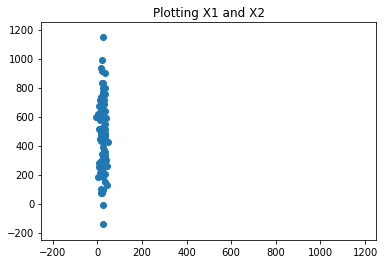

In [8]:
plt.title("Plotting X1 and X2")
plt.xlim(-250,1250)
plt.ylim(-250,1250)
plt.scatter(df['x1'], df['x2']);

In [9]:
# Remember that we want to scale our variables! Since clustering is distance-based,
# if we don't scale, certain variables will have more of an impact.

df = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['x1', 'x2'])

In [10]:
df.head()

,x1,x2
0,0.642826,-0.861523
1,-3.098487,0.496326
2,-0.879843,1.920890
3,1.087135,-0.106281
4,-0.644120,-1.727553


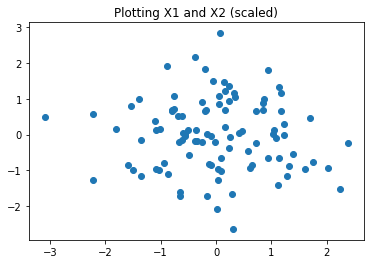

In [11]:
plt.title("Plotting X1 and X2 (scaled)")
plt.scatter(df['x1'], df['x2']);

#### Let's fit DBSCAN on our data with `eps = 0.5` and `min_samples = 5`. (Note: This is the default in `sklearn`!)

In [12]:
cluster = DBSCAN(eps = 0.5,
                 min_samples = 5)

In [13]:
cluster.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [14]:
labels = cluster.labels_

In [15]:
print(labels)

[ 0 -1 -1  0  2  0  0  0  0  0  0  0  0 -1  0  0  0  0  2  0 -1  0  0  0
  0  0  0  0  1  0  0  0  0  1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0
  0  0 -1  2 -1  0  0  0  0  1  0  1  0  0  0 -1  2  0  0  0  0  0 -1  0
  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  1  0  0  0  0  0 -1  0  0 -1
  0  0  1 -1]


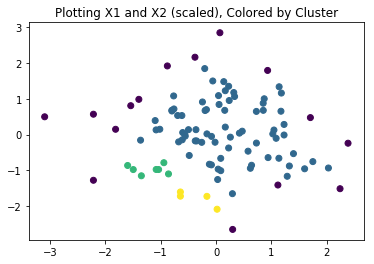

In [16]:
plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [17]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coefficient: 0.145687


#### Go ahead and fit DBSCAN on our data with `eps = 1` and `min_samples = 5`.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


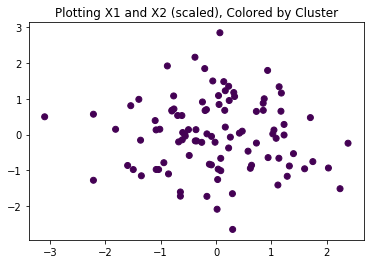

In [18]:
cluster = DBSCAN(eps = 1,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [19]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [20]:
## Ahh! If all of our values are in one cluster, we cannot calculate silhouette score!

#### Let's try DBSCAN on our data with `eps = 1` and `min_samples = 20`.

[ 0 -1  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0 -1]


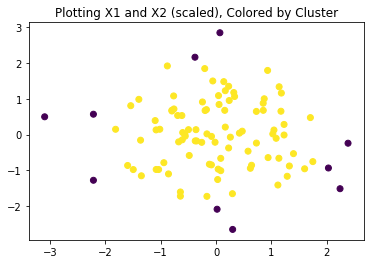

In [21]:
cluster = DBSCAN(eps = 1,
                 min_samples = 20)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [22]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coefficient: 0.350140


### Dataset 2: Smiley/Frowny

In [23]:
x1_1 = np.random.uniform(0, 50, 100)

x1_2 = np.random.uniform(60, 110, 100)

x2_1 = (x1_1 - 25)  ** 2 + np.random.normal(0, 10, 1)

x2_2 = -1 * (x1_2 - 85) ** 2 + np.random.normal(0, 10, 1)

In [24]:
x1 = np.append(x1_1, x1_2)
    
x2 = np.append(x2_1, x2_2)

In [25]:
df = pd.DataFrame()

df = df.from_dict({'x1': x1,
                   'x2': x2})

In [26]:
df.tail()

,x1,x2
195,61.791558,-538.051251
196,61.006860,-575.090278
197,81.165054,-14.126303
198,65.895501,-364.401381
199,73.686011,-127.425831


In [27]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = ['x1', 'x2'])

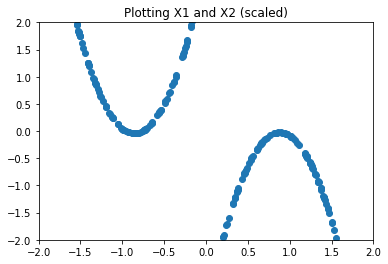

In [28]:
plt.title("Plotting X1 and X2 (scaled)")
plt.xlim(-2,2)
plt.ylim(-2, 2)
plt.scatter(df['x1'], df['x2']);

#### Let's try DBSCAN on our data with `eps = 0.2` and `min_samples = 5`.

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0 -1  0
  0  0 -1  0  1  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  1  1  2  2  2  2  2  2  2  2  2 -1  2  2  3  2  2  2  3  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2  2  2  2  2  2
  2 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  2  2  2  2  2  2
  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  2 -1  2  2  2  2  2  2  3  2
  2  2  2  3  3  2  2  2]


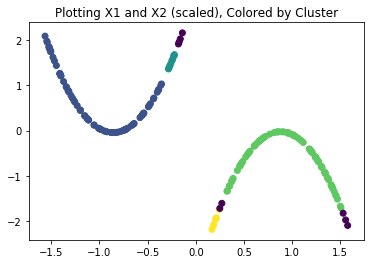

In [29]:
cluster = DBSCAN(eps = 0.2,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [30]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coefficient: 0.390082


#### By only tweaking `epsilon`, can you get the above to return exactly two clusters? (The two clusters we would expect?)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


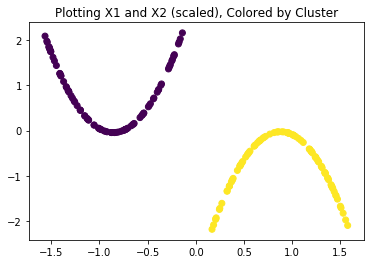

In [31]:
cluster = DBSCAN(eps = 1,
                 min_samples = 5)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [32]:
print('Silhouette Coefficient: %0.6f' % metrics.silhouette_score(df, labels))

Silhouette Coefficient: 0.617735


#### By only tweaking `min_samples`, can you get the above to return exactly two clusters? (The two clusters we would expect?) Be sure to reset `eps` to `0.2`.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 2 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 3 3 3 3 4 4 3 3 3]


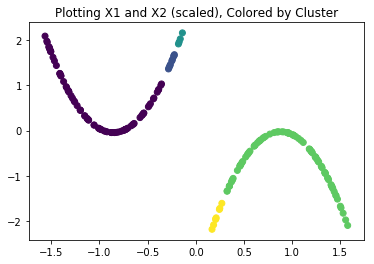

In [33]:
cluster = DBSCAN(eps = 0.2,
                 min_samples = 1)

cluster.fit(df)

labels = cluster.labels_

print(cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by Cluster")
plt.scatter(df['x1'], df['x2'], c = cluster.labels_);

In [34]:
for i in range(0,200):
    cluster = DBSCAN(eps = 0.2, min_samples = i)
    cluster.fit(df)
    labels = cluster.labels_
    if len(set(cluster.labels_)) == 1 and cluster.labels_[i] != -1: ## Remember that -1 means an outlier!
        print("Yes! Use min_samples = " + str(i))
        break
    else:
        print("Not min_samples = " + str(i))

Not min_samples = 0
Not min_samples = 1
Not min_samples = 2
Not min_samples = 3
Not min_samples = 4
Not min_samples = 5
Not min_samples = 6
Not min_samples = 7
Not min_samples = 8
Not min_samples = 9
Not min_samples = 10
Not min_samples = 11
Not min_samples = 12
Not min_samples = 13
Not min_samples = 14
Not min_samples = 15
Not min_samples = 16
Not min_samples = 17
Not min_samples = 18
Not min_samples = 19
Not min_samples = 20
Not min_samples = 21
Not min_samples = 22
Not min_samples = 23
Not min_samples = 24
Not min_samples = 25
Not min_samples = 26
Not min_samples = 27
Not min_samples = 28
Not min_samples = 29
Not min_samples = 30
Not min_samples = 31
Not min_samples = 32
Not min_samples = 33
Not min_samples = 34
Not min_samples = 35
Not min_samples = 36
Not min_samples = 37
Not min_samples = 38
Not min_samples = 39
Not min_samples = 40
Not min_samples = 41
Not min_samples = 42
Not min_samples = 43
Not min_samples = 44
Not min_samples = 45
Not min_samples = 46
Not min_samples = 47
No

### Let's try HDBSCAN on this data!

In [35]:
import hdbscan

In [36]:
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 5,      # analogous to min_samples
                            gen_min_span_tree = True)  # saves our dendrogram for later!

In [37]:
h_cluster.fit(df)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

In [38]:
labels = h_cluster.labels_

print(h_cluster.labels_)

[14  2 -1  6 -1 14 -1 -1 -1  2 -1 14  2  8  2 -1  6  8 14 13  0  2  0 14
 14 14  0 14  0 14  6 14 -1  2 -1 14 -1 14 -1  0 -1  0  6 14 14 13  2  2
 14 14  8 -1 14 -1  8  6  8 14 14  6  6 -1 13 -1 -1 -1 -1 -1 14 14 -1  2
 -1 14  2 -1  0 14 13 -1 14  2  0  6 -1  2 14 13 14  0 -1 14 -1 14 14 13
  8 14  0  0 -1 12 11  3  3 12 12 11 11 -1 -1  9  1  3  4 10 -1  5  4 10
 11 -1  5 12 12 12 11 10 10  7 11 11 -1 12  5 -1 10 -1  3 -1  9  7 -1  9
 -1  1 12 -1  9 -1 12 11  4 12 -1  4  5  9 12 12 12  1 12  5 -1 12  5  3
  5  7  4 -1 -1 -1  4  1 -1  9  7 -1 10 12  3 -1  7  9  4  7 12 -1  1  3
  7  7 12  1 -1 12 -1 -1]


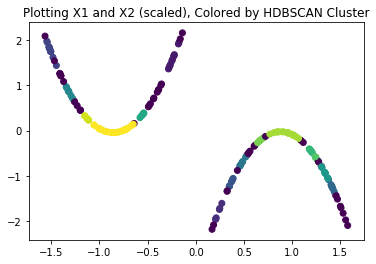

In [39]:
plt.title("Plotting X1 and X2 (scaled), Colored by HDBSCAN Cluster")
plt.scatter(df['x1'], df['x2'], c = h_cluster.labels_);

[39 14 10 32 22 34  7  8 34 -1 33 39 13  9  3  7 33  9 39 23  2 14  0 34
 40 39  0 38  2 41 32 39  3 -1  8 37 10 39 10  1  7  2 -1 40 38 23 14 -1
 38 -1  9  7 37 -1  9 32  9 -1 38 32 32  0 23 22 22  8 10 -1 41 39  0 14
 10 34 13 33  2 39 23 -1 39 13  1 33  8 14 39 23 38  1  7 37  8 -1 41 23
  9 40  1  1  6 35 29 12 11 36 35 29 29  6 15 24  4 12 15 26 -1 20 17 26
 30 15 20 31 31 36 30 26 26 18 28 29 -1 35 20 28 27  6 12 28 24 18 -1 25
 -1  5 36 27 25  6 31 29 16 36 21 16 20 25 35 35 36  5 35 20 21 31 21 11
 20 17 16 -1 21 19 16  5 30 24 18 27 26 -1 11 -1 17 24 16 19 31 -1  4 11
 19 18 -1  4  4 -1 -1 21]


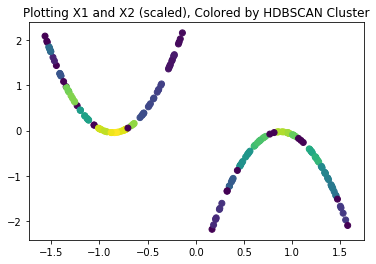

In [40]:
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 2,      
                            gen_min_span_tree = True)

h_cluster.fit(df)

labels = h_cluster.labels_

print(h_cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by HDBSCAN Cluster")
plt.scatter(df['x1'], df['x2'], c = h_cluster.labels_);

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1]


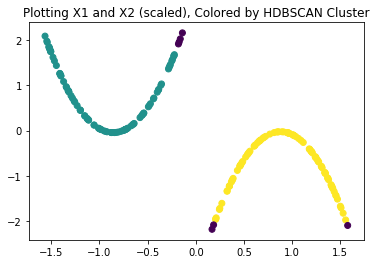

In [41]:
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 25,      
                            gen_min_span_tree = True)

h_cluster.fit(df)

labels = h_cluster.labels_

print(h_cluster.labels_)

plt.title("Plotting X1 and X2 (scaled), Colored by HDBSCAN Cluster")
plt.scatter(df['x1'], df['x2'], c = h_cluster.labels_);

In [42]:
for i in range(2,200):
    cluster = hdbscan.HDBSCAN(min_cluster_size = i, gen_min_span_tree = True)
    cluster.fit(df)
    labels = cluster.labels_
    if len(set(cluster.labels_)) == 1 and cluster.labels_[i] != -1: ## Remember that -1 means an outlier!
        print("Yes! Use min_samples = " + str(i))
        break
    else:
        print("Not min_samples = " + str(i))

Not min_samples = 2
Not min_samples = 3
Not min_samples = 4
Not min_samples = 5
Not min_samples = 6
Not min_samples = 7
Not min_samples = 8
Not min_samples = 9
Not min_samples = 10
Not min_samples = 11
Not min_samples = 12
Not min_samples = 13
Not min_samples = 14
Not min_samples = 15
Not min_samples = 16
Not min_samples = 17
Not min_samples = 18
Not min_samples = 19
Not min_samples = 20
Not min_samples = 21
Not min_samples = 22
Not min_samples = 23
Not min_samples = 24
Not min_samples = 25
Not min_samples = 26
Not min_samples = 27
Not min_samples = 28
Not min_samples = 29
Not min_samples = 30
Not min_samples = 31
Not min_samples = 32
Not min_samples = 33
Not min_samples = 34
Not min_samples = 35
Not min_samples = 36
Not min_samples = 37
Not min_samples = 38
Not min_samples = 39
Not min_samples = 40
Not min_samples = 41
Not min_samples = 42
Not min_samples = 43
Not min_samples = 44
Not min_samples = 45
Not min_samples = 46
Not min_samples = 47
Not min_samples = 48
Not min_samples = 49


Recall that our learning objectives were to:
- Describe the effect of epsilon and min_points on DBSCAN.
- Implement DBSCAN.
- Identify advantages and disadvantages of DBSCAN.
- Explain and implement HDBSCAN.

<details>
<summary>Describe the effect of epsilon and min_points on DBSCAN.</summary>
```
- epsilon is a hyperparameter of DBSCAN that refers to how far we will "search" from a point to see if other points should be clustered with that point. As epsilon increases, we search farther and expect to include more points in a cluster.
- min_points is a hyperparameter of DBSCAN that refers to how many points are needed for a group to officially be called a "cluster."
- As min_points increases, we expect the number of clusters will decrease and the number of outliers will increase.
```
</details>

<br>

<details>
<summary>Identify advantages of DBSCAN.</summary>
```
- DBSCAN detects clusters that are more dense than outliers.
- DBSCAN can detect concave or irregularly-shaped clusters, whereas most other clustering algorithms cannot (easily) do the same.
- DBSCAN doesn't classify all points, meaning we can use DBSCAN for outlier detection. (The same is not true of hierarchical or k-means clustering.)
- DBSCAN does not need us to pre-identify the number of clusters.
- DBSCAN is generally quite fast.
```
</details>

<br>

<details>
<summary>Identify disadvantages of DBSCAN.</summary>
```
- DBSCAN requires two hyperparameters to tune. This can be difficult, especially in cases where there are not labels to define metrics to "gridsearch" over.
    - The value of epsilon you choose to search is highly dependent on how you scale your variables.
    - To define an appropriate min_samples, you may need a subject-matter expert.
```
</details>

<br>

<details>
<summary>Explain HDBSCAN.</summary>
```
- HDBSCAN requires only one hyperparameter to tune: the minimum number of points you need to define a cluster.
- HDBSCAN calculates, for each point, the epsilon searching distance needed to meet the minimum number of points. The algorithm then constructs a dendrogram using epsilon as the distance between clusters and prunes any clusters that don't meet the minimum points threshold.
```
</details>